In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.size

10692

In [43]:
df.shape

(891, 12)

In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# excluding collums which is not required
df.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [49]:
X = df.drop(["Survived"],axis="columns")
Y = df["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
X['Sex'] = X['Sex'].replace({"male": 0, "female": 1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [51]:
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [54]:
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Age'].iloc[0:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [55]:
train_test_split(X,Y,train_size = 0.8)

[     Pclass  Sex        Age
 629       3    0  29.699118
 721       3    0  17.000000
 251       3    1  29.000000
 105       3    0  28.000000
 693       3    0  25.000000
 ..      ...  ...        ...
 471       3    0  38.000000
 476       2    0  34.000000
 691       3    1   4.000000
 767       3    1  30.500000
 11        1    1  58.000000
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 764       3    0  16.000000
 121       3    0  29.699118
 630       1    0  80.000000
 393       1    1  23.000000
 182       3    0   9.000000
 ..      ...  ...        ...
 841       2    0  16.000000
 36        3    0  29.699118
 311       1    1  18.000000
 572       1    0  36.000000
 277       2    0  29.699118
 
 [179 rows x 3 columns],
 629    0
 721    0
 251    0
 105    0
 693    0
       ..
 471    0
 476    0
 691    1
 767    0
 11     1
 Name: Survived, Length: 712, dtype: int64,
 764    0
 121    0
 630    1
 393    1
 182    0
       ..
 841    0
 36     1
 311    1
 572  

In [56]:
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
len(X_train)

712

In [57]:
len(X_test)

179

In [58]:
X_test

,Pclass,Sex,Age
250,3,0,29.699118
507,1,0,29.699118
212,3,0,22.000000
344,2,0,36.000000
3,1,1,35.000000
...,...,...,...
440,2,1,45.000000
38,3,1,18.000000
113,3,1,20.000000
237,2,1,8.000000


# Model Building

# 1. Decision Tree

In [59]:
model_dt = tree.DecisionTreeClassifier(max_depth=3)   
model_dt

DecisionTreeClassifier(max_depth=3)

In [63]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
predictions = model_dt.predict(X_test)

In [64]:
model_dt.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [65]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [68]:
result = pd.DataFrame({"Survived REAL": Y_real, "Survived PREDICTION": predictions})
result

,Survived REAL,Survived PREDICTION
250,0,0
507,1,0
212,0,0
344,0,0
3,1,1
...,...,...
440,1,1
38,0,0
113,0,0
237,1,1


# Plotting Tree

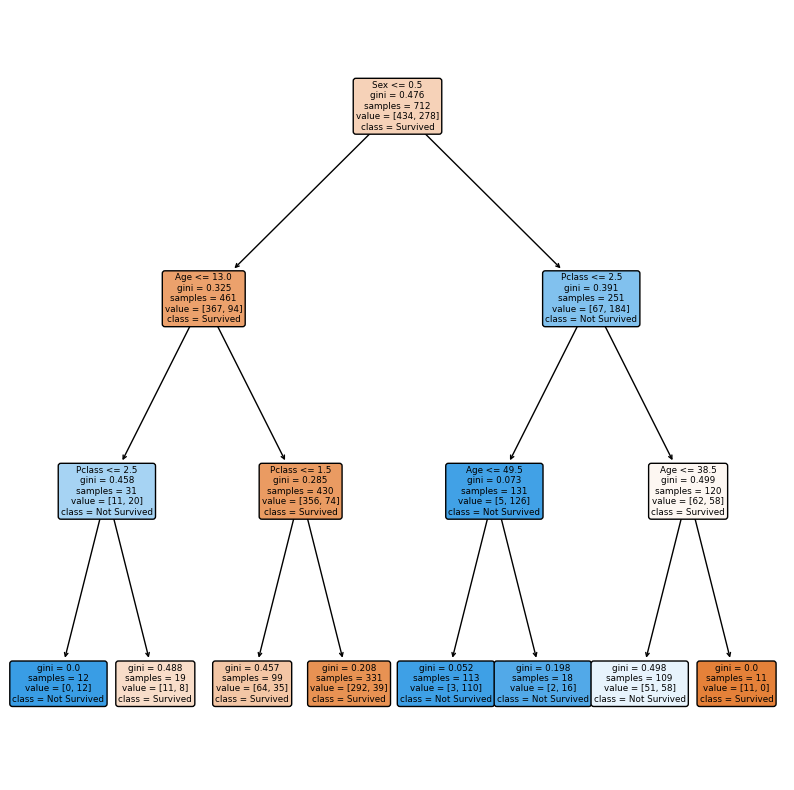

In [71]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, Y_train)
plt.figure(figsize=(10, 10))
plot_tree(model_dt, feature_names=['Pclass', 'Sex', 'Age'], class_names=['Survived', 'Not Survived'], filled=True, rounded=True)
plt.show()

## Performance Measurement

## Accuracy

In [170]:
accuracy_dt = model_dt.score(X_test, Y_real)
accuracy_decimal = "{:.3f}".format(accuracy_dt)
print("Accuracy:", accuracy_decimal)

Accuracy: 0.832


## Precision 

In [171]:
precision_dt = metrics.precision_score(Y_real, Y_pred_dt)
precision_decimal = "{:.3f}".format(precision_dt)
print("Precision:", precision_decimal)

Precision: 0.700


## Recall 

In [172]:
recall_dt = metrics.recall_score(Y_real, Y_pred_dt)
recall_decimal = "{:.3f}".format(recall_dt)
print("Recall:", recall_decimal)

Recall: 0.656


## Confusion Matrix  

In [79]:
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[97, 18],
       [22, 42]], dtype=int64)

<Axes: >

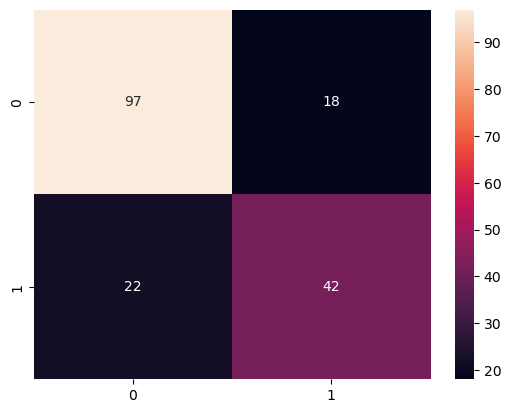

In [80]:
sns.heatmap(confusion_matrix_dt, annot=True)

## AUC - ROC Curve 

In [173]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt)
auc_dt_formatted = f'{auc_dt:.3f}'
print("AUC Score:", auc_dt_formatted)

AUC Score: 0.750


# DT K-Fold Cross Validation

In [174]:
kf_dt = KFold(n_splits=5, shuffle=True)
cv_dt = cross_val_score(model, X, Y, cv=kf_dt)
mean_cv_score = np.mean(cv_dt)
mean_cv_score_formatted = f'{mean_cv_score:.3f}'
print("Mean Cross-Validation Score:", mean_cv_score_formatted)

Mean Cross-Validation Score: 0.818


# Logistic Regression

In [92]:
model_lr = LogisticRegression(solver='liblinear')

In [93]:
model_lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [94]:
y_pred_lg = model_lr.predict(X_test)
y_pred_lg

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

## Performance Measurement

## Accuracy

In [175]:
accuracy_lg = model_lr.score(X_test, Y_real)
accuracy_lg_formatted = f'{accuracy_lg:.3f}'
print("Accuracy:", accuracy_lg_formatted)

Accuracy: 0.838


## Precision 

In [96]:
precision_lg = metrics.precision_score(Y_real, y_pred_lg)
precision_lg_percentage = "{:.3f}%".format(precision_lg * 100)
print("Precision:", precision_lg_percentage)

Precision: 76.923%


## Recall 

In [97]:
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg_percentage = "{:.3f}%".format(rec_lg * 100)
print("Recall:", rec_lg_percentage)

Recall: 78.125%


## Confusion Matrix 

In [98]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[100,  15],
       [ 14,  50]], dtype=int64)

<Axes: >

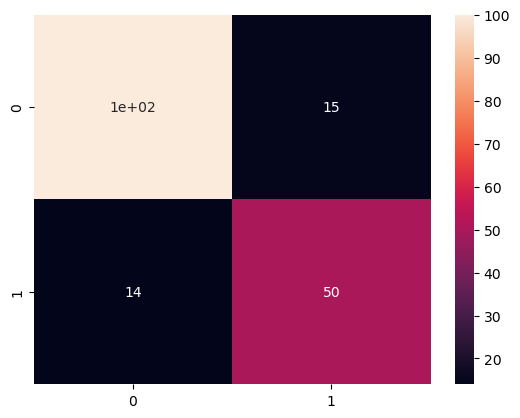

In [99]:
sns.heatmap(cm_lg, annot=True)

## AUC - ROC Curve 

In [101]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg)
auc_lg_percentage = "{:.3f}%".format(auc_lg * 100)
print("AUC Score:", auc_lg_percentage)

AUC Score: 82.541%


## LR K-Fold Cross Validation 

In [102]:
kf_lg = KFold(n_splits=5,shuffle=True)  

In [104]:
cv_lg = cross_val_score(model_lr, X, Y, cv=kf_lg)
mean_cv_accuracy = np.mean(cv_lg)
mean_cv_accuracy_percentage = "{:.3f}%".format(mean_cv_accuracy * 100)
print("Cross Validation Accuracy:", mean_cv_accuracy_percentage)

Cross Validation Accuracy: 79.682%


# Support Vector Machines (SVM)

In [106]:
model_svc = svm.SVC(kernel="linear")
model_svc

SVC(kernel='linear')

In [107]:
model_svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [108]:
Y_pred_svm = model_svc.predict(X_test)
Y_pred_svm

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

## Performance Measurement

## Accuracy

In [176]:
accuracy_svc = model_svc.score(X_test, Y_real)
accuracy_svc_formatted = f'{accuracy_svc:.3f}'
print("Accuracy:", accuracy_svc_formatted)

Accuracy: 0.838


## Precision 

In [112]:
precision_svc = precision_score(Y_real, Y_pred_svm)
precision_svc_percentage = "{:.3f}%".format(precision_svc * 100)
print("Precision:", precision_svc_percentage)

Precision: 77.778%


## Recall 

In [115]:
rec_svc = recall_score(Y_real, Y_pred_svm)
rec_svc_percentage = "{:.3f}%".format(rec_svc * 100)
print("Recall:", rec_svc_percentage)

Recall: 76.562%


## Confusion Matrix 

In [116]:
cm_svc = metrics.confusion_matrix(Y_real,Y_pred_svm)
cm_svc

array([[101,  14],
       [ 15,  49]], dtype=int64)

<Axes: >

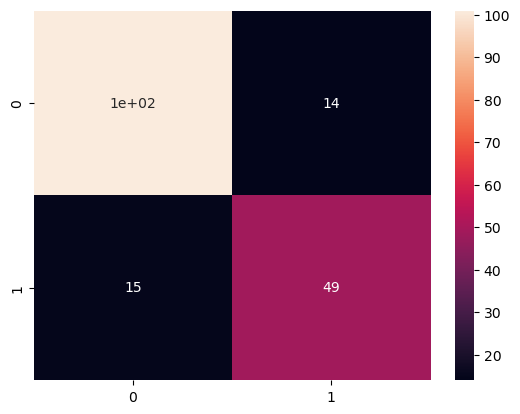

In [117]:
sns.heatmap(cm_svc, annot=True)

## AUC - ROC Curve 

In [120]:
auc_svc = roc_auc_score(Y_real, Y_pred_svm)
auc_svc_percentage = "{:.3f}%".format(auc_svc * 100)
print("AUC:", auc_svc_percentage)

AUC: 82.194%


## SVM  K-Fold Cross Validation 

In [121]:
kf_svc = KFold(n_splits=5,shuffle=True)  

In [122]:
cv_svc = cross_val_score(model_svc, X, Y, cv=kf_svc)
mean_cv_svc = np.mean(cv_svc)
mean_cv_svc_percentage = "{:.3f}%".format(mean_cv_svc * 100)
print("Cross-validated Accuracy:", mean_cv_svc_percentage)

Cross-validated Accuracy: 78.678%


# Random Forest

In [123]:
model_rf = RandomForestClassifier().fit(X_train,Y_train)

In [124]:
y_pred_forest = model_rf.predict(X_test)
y_pred_forest

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

## Performance Measurement

## Accuracy

In [178]:
accuracy_forest = model_rf.score(X_test, Y_real)
accuracy_forest_formatted = f'{accuracy_forest:.3f}'
print("Accuracy:", accuracy_forest_formatted)

Accuracy: 0.793


## Precision 

In [127]:
precision_forest = precision_score(Y_real, y_pred_forest)
precision_forest_percentage = "{:.3f}%".format(precision_forest * 100)
print("Precision:", precision_forest_percentage)

Precision: 71.429%


## Recall 

In [128]:
recall_forest = recall_score(Y_real, y_pred_forest)
recall_forest_percentage = "{:.3f}%".format(recall_forest * 100)
print("Recall:", recall_forest_percentage)

Recall: 70.312%


## Confusion Matrix 

In [129]:
cm_forest = metrics.confusion_matrix(Y_real,y_pred_forest)
cm_forest

array([[97, 18],
       [19, 45]], dtype=int64)

<Axes: >

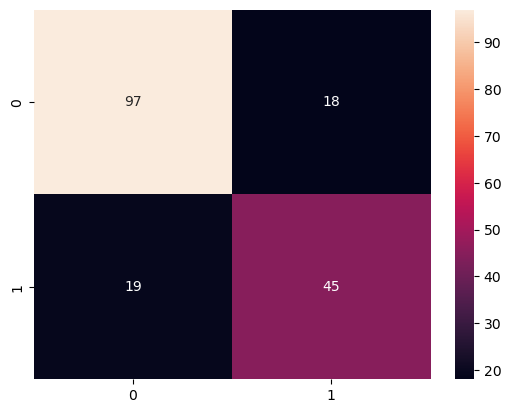

In [130]:
sns.heatmap(cm_forest, annot=True)

## AUC - ROC Curve 

In [147]:
auc_forest = roc_auc_score(Y_real, y_pred_forest)
auc_forest_percentage = "{:.3f}%".format(auc_forest * 100)
print("AUC:", auc_forest_percentage)

AUC: 77.330%


## RF K-Fold Cross-Validation 

In [132]:
kf_forest = KFold(n_splits=5,shuffle=True)  

In [150]:
cv_forest = cross_val_score(model_rf, X, Y, cv=kf_forest)
mean_accuracy_forest = np.mean(cv_forest)
mean_accuracy_forest_percentage = "{:.3f}%".format(mean_accuracy_forest * 100)
print("Cross Validation Accuracy:", mean_accuracy_forest_percentage)

Cross Validation Accuracy: 80.358%


# K-Nearest Neighbors

In [134]:
knn_model = KNeighborsRegressor()
knn_model

KNeighborsRegressor()

In [135]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [136]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0. , 0. , 0.2, 0.2, 1. , 0. , 0.8, 0. , 0.2, 0.4, 0.2, 1. , 0.4,
       1. , 0.2, 1. , 1. , 1. , 0. , 0.2, 0.4, 0. , 0. , 0.2, 0.4, 0.6,
       0. , 0.4, 0.4, 0. , 1. , 1. , 0. , 1. , 0.6, 0. , 0.8, 0.4, 0.6,
       0.2, 0. , 0. , 0.4, 0.4, 0.6, 0.2, 0. , 0.4, 0.4, 0. , 0. , 0.6,
       0.6, 0.4, 0.6, 0. , 1. , 1. , 1. , 0.6, 0.2, 0.2, 1. , 0.2, 0.2,
       0.4, 0.4, 0. , 0. , 0.2, 0.6, 0.2, 0.6, 0.8, 0.6, 0.2, 0. , 0. ,
       0.6, 0.2, 0.6, 0.4, 0. , 0.2, 0.4, 0. , 0.4, 0.4, 0. , 0. , 0. ,
       0.6, 0.4, 0. , 0. , 0. , 0.8, 0. , 0.8, 0.2, 0.8, 0.2, 0.8, 0. ,
       0.2, 0.6, 0.4, 0.8, 0.2, 0. , 0.2, 1. , 1. , 0.4, 0.8, 0.4, 0.2,
       0. , 0.8, 0. , 1. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0.8,
       0.2, 0.6, 0.2, 0.2, 0.2, 0.6, 0. , 0.4, 1. , 0.6, 0.6, 0. , 0.6,
       0.4, 0.4, 0.4, 0.2, 0.8, 0. , 0.6, 0.6, 1. , 0.4, 0.6, 0.2, 0.2,
       0.4, 1. , 0. , 0.2, 1. , 0.2, 0.6, 0.4, 0.4, 0.2, 0. , 0.2, 0.4,
       0. , 0.6, 0. , 0. , 0.2, 0.4, 0.4, 0.8, 0.4, 0.2])

## Performance Measurement

## Accuracy

In [137]:
rounding = np.round(y_pred_knn)  

In [179]:
acc_knn = metrics.accuracy_score(Y_real, rounding)
acc_knn_formatted = f'{acc_knn:.3f}'
print("Accuracy:", acc_knn_formatted)

Accuracy: 0.765


## Precision 

In [141]:
precision_knn_percentage = precision_score(Y_real, rounding) * 100
print("Precision:", "{:.3f}%".format(precision_knn_percentage))

Precision: 68.966%


## Recall 

In [142]:
recall_knn_percentage = recall_score(Y_real, rounding) * 100
print("Recall:", "{:.3f}%".format(recall_knn_percentage))

Recall: 62.500%


## Confusion Matrix 

In [143]:
cm_knn = metrics.confusion_matrix(Y_real, rounding)
cm_knn

array([[97, 18],
       [24, 40]], dtype=int64)

<Axes: >

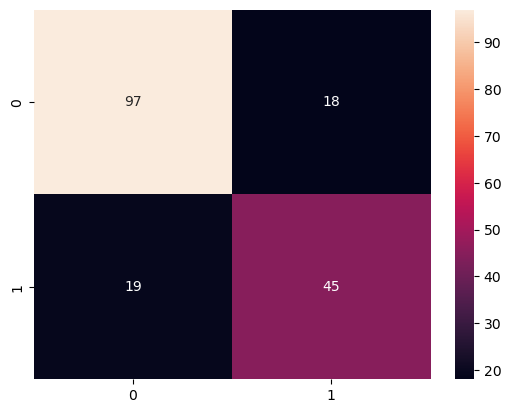

In [144]:
sns.heatmap(cm_forest, annot=True)

## AUC - ROC Curve 

In [145]:
auc_knn_percentage = roc_auc_score(Y_real, rounding) * 100
print("AUC:", "{:.3f}%".format(auc_knn_percentage))

AUC: 73.424%


## KNN K-Fold Cross Validation 

In [151]:
kf_neighbors = KFold(n_splits=5,shuffle=True)  

In [154]:
cv_accuracy_neighbors = cross_val_score(knn_model, X, Y, cv=kf_neighbors)
mean_cv_accuracy_neighbors = np.mean(cv_accuracy_neighbors) * 100
print("Cross Validation Accuracy:", "{:.3f}%".format(mean_cv_accuracy_neighbors))

Cross Validation Accuracy: 23.822%


# Valuation Analysis

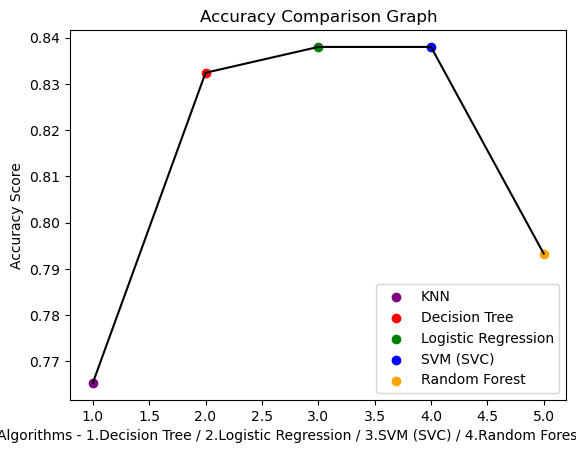

In [181]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Logistic Regression / 3.SVM (SVC) / 4.Random Forest / 5.KNN")

y = [acc_knn,accuracy_dt,accuracy_lg,accuracy_svc,accuracy_forest]

plt.plot([1,2,3,4,5],y, color = "black")


plt.scatter(1,acc_knn, marker="o", color = "purple",label = "KNN")

plt.scatter(2,accuracy_dt, marker="o", color="red", label="Decision Tree")

plt.scatter(3,accuracy_lg, marker="o", color="green", label="Logistic Regression")

plt.scatter(4,accuracy_svc, marker="o", color="blue", label="SVM (SVC)")

plt.scatter(5,accuracy_forest, marker="o", color = "orange",label = "Random Forest")

 
plt.legend()
plt.show()